In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv(r"EasyVisa.csv")

In [3]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [5]:
#define numerical and categorical feature
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
catergorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print(f"we have {len(numerical_feature)} numerical features: {numerical_feature}")
print(f"we have {len(catergorical_feature)} categorical features: {catergorical_feature}")

we have 3 numerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
we have 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [6]:
#Proportion of count data on categorical columns
for col in catergorical_feature:
    print(df[col].value_counts(normalize=True)* 100)
    print("--------------------------------------")

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
--------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
--------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
--------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
--------------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-------------------

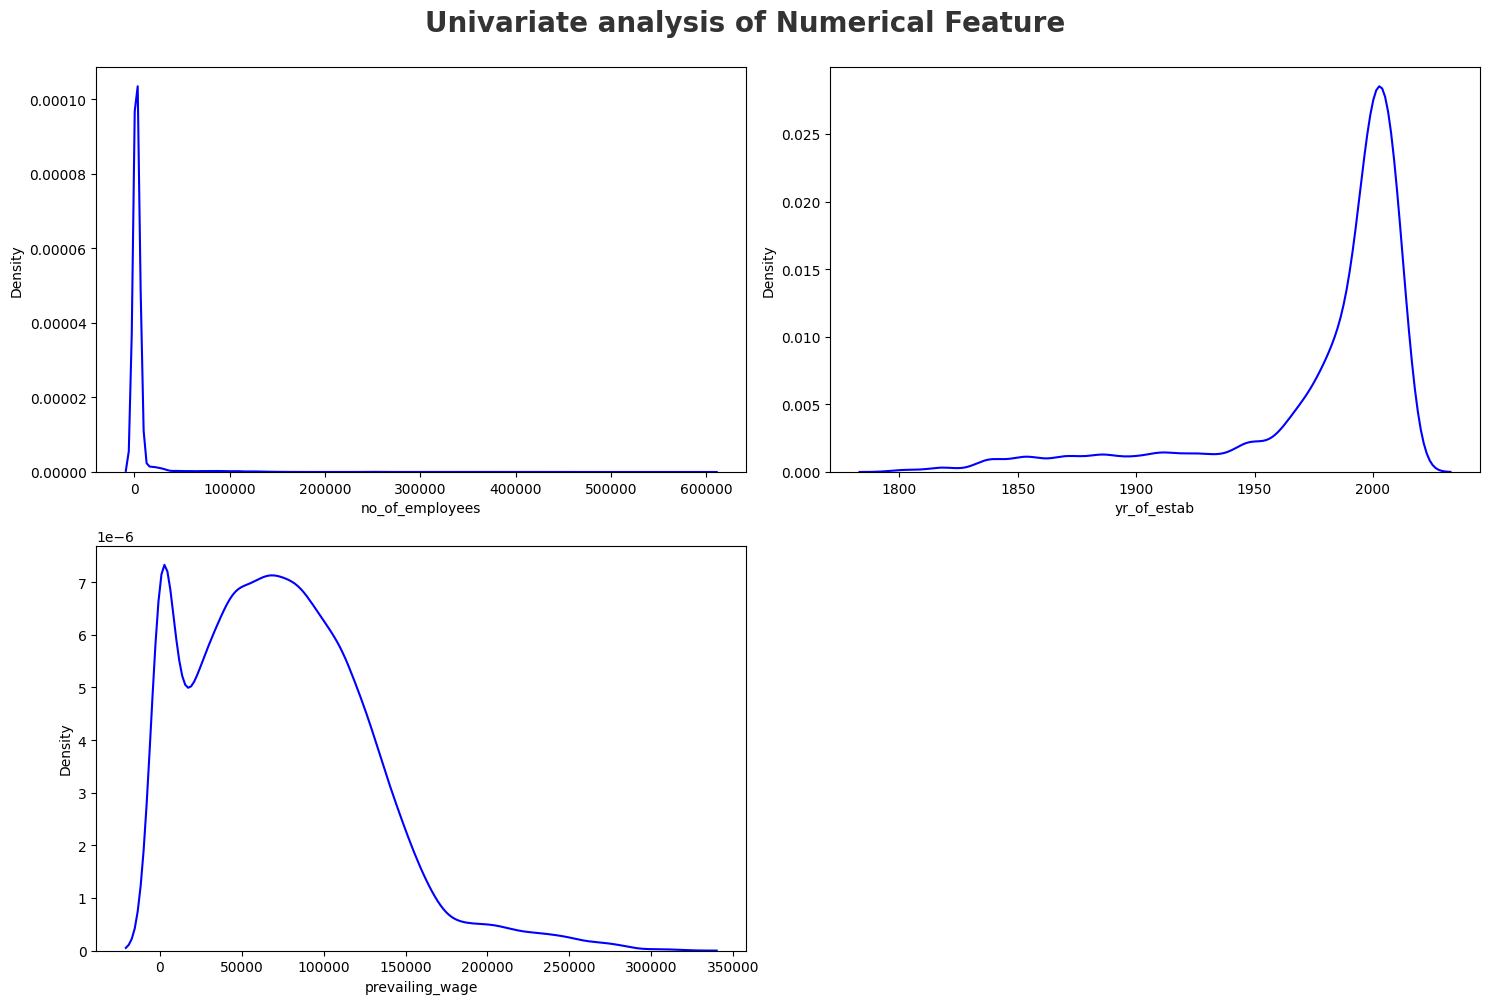

In [7]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate analysis of Numerical Feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_feature)):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(x=df[numerical_feature[i]], color='blue')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

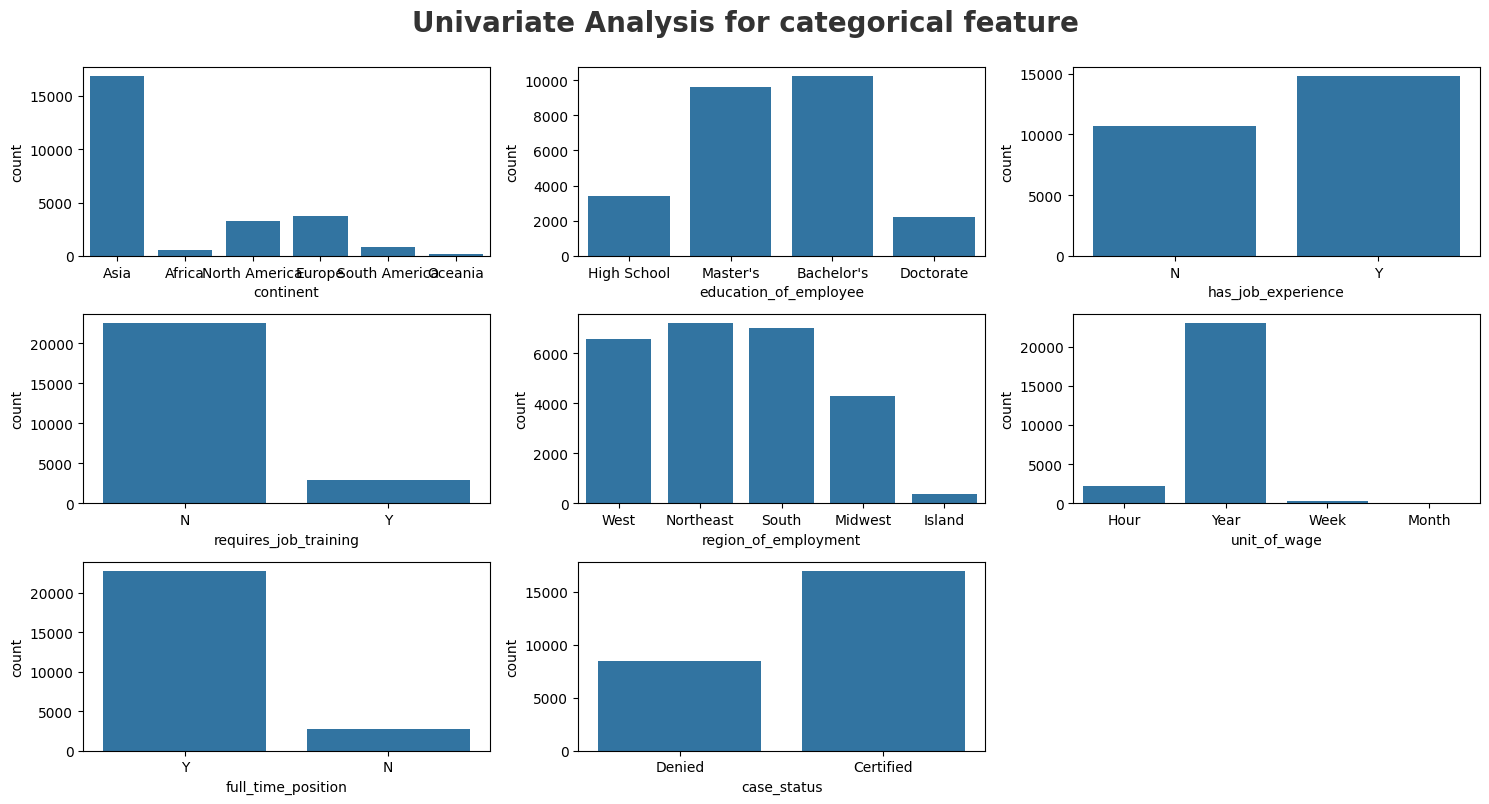

In [8]:
#Categorical columns
catergorical_feature.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis for categorical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(catergorical_feature)):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=df[catergorical_feature[i]])
    plt.xlabel(catergorical_feature[i])
    plt.tight_layout()

In [9]:
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique()) <= 25]
continues_feature = [feature for feature in numerical_feature if len(df[feature].unique()) > 25]

print(f"we have {len(discrete_feature)} discrete features: {discrete_feature}")
print(f"we have {len(continues_feature)} continues features: {continues_feature}")

we have 0 discrete features: []
we have 3 continues features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [10]:
from scipy.stats import chi2_contingency

chi2_test = []
for features in catergorical_feature:
    if chi2_contingency(pd.crosstab(df['case_status'], df[features]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("fail to reject Null Hypothesis")
result = pd.DataFrame(data=[catergorical_feature, chi2_test]).T
result.columns = ['columns', 'Hypothesis Result']
result

,columns,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,fail to reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


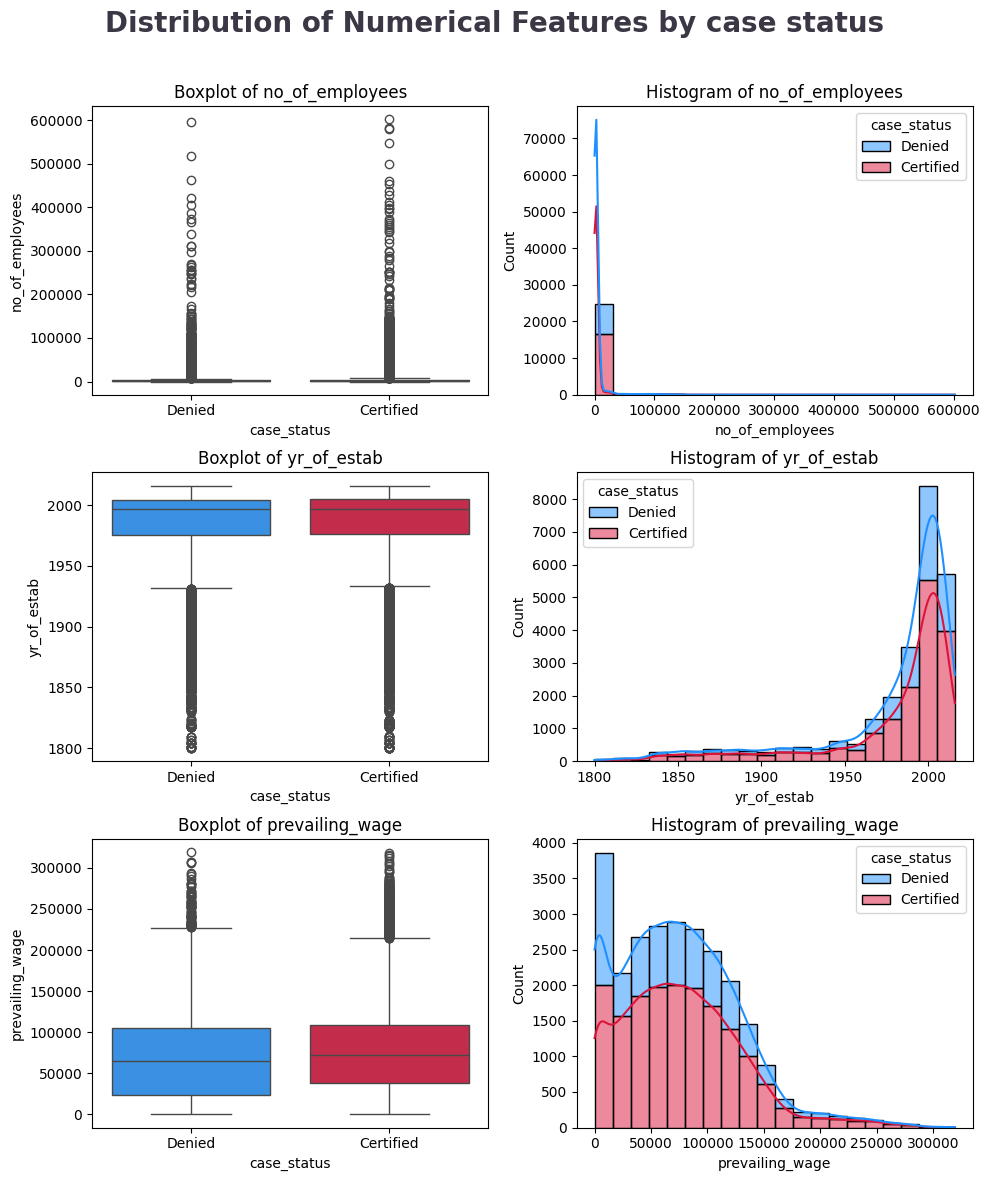

In [11]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features by case status', color='#3C3744', fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_feature):
    sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=12)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)


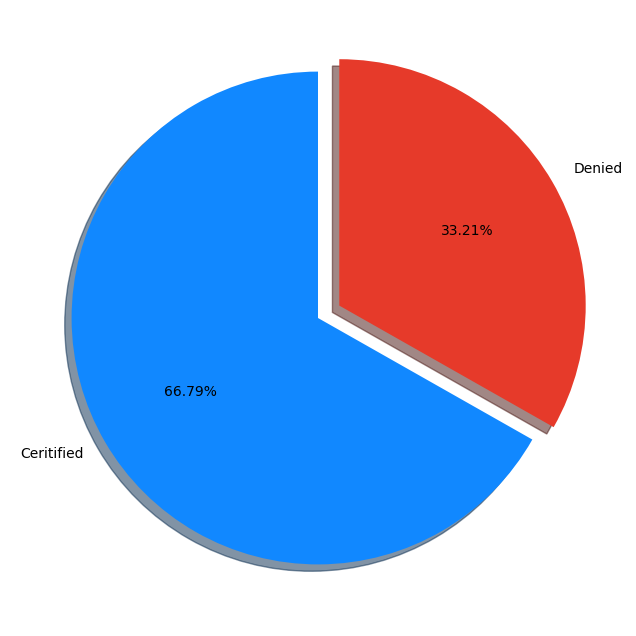

In [12]:
precentage = df.case_status.value_counts(normalize=True) * 100
labels = ["Ceritified", "Denied"]

fig, ax = plt.subplots(figsize=(15,8))
explode = (0, 0.1)
colors = ["#1188ff", "#e63a2a"]
ax.pie(precentage, labels = labels, startangle = 90, autopct='%1.2f%%', explode=explode, shadow=True, colors= colors)
plt.show()

In [13]:
#group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

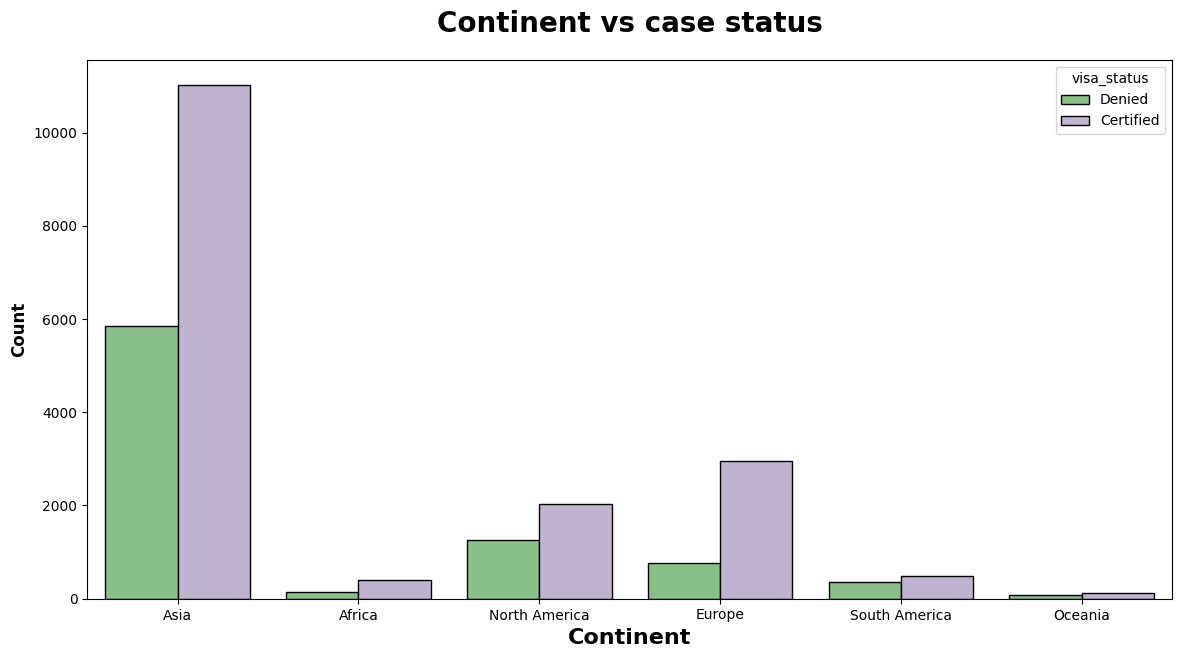

In [14]:
plt.subplots(figsize=(14, 7))
sns.countplot(x="continent", hue="case_status", data=df, ec="black", palette="Accent")
plt.title("Continent vs case status", weight='bold', fontsize=20, pad=20)
plt.ylabel("Count", weight='bold', fontsize=12)
plt.xlabel('Continent', weight='bold', fontsize=16)
plt.legend(title="visa_status", fancybox=True)
plt.show()

In [15]:
df2 = df.copy()

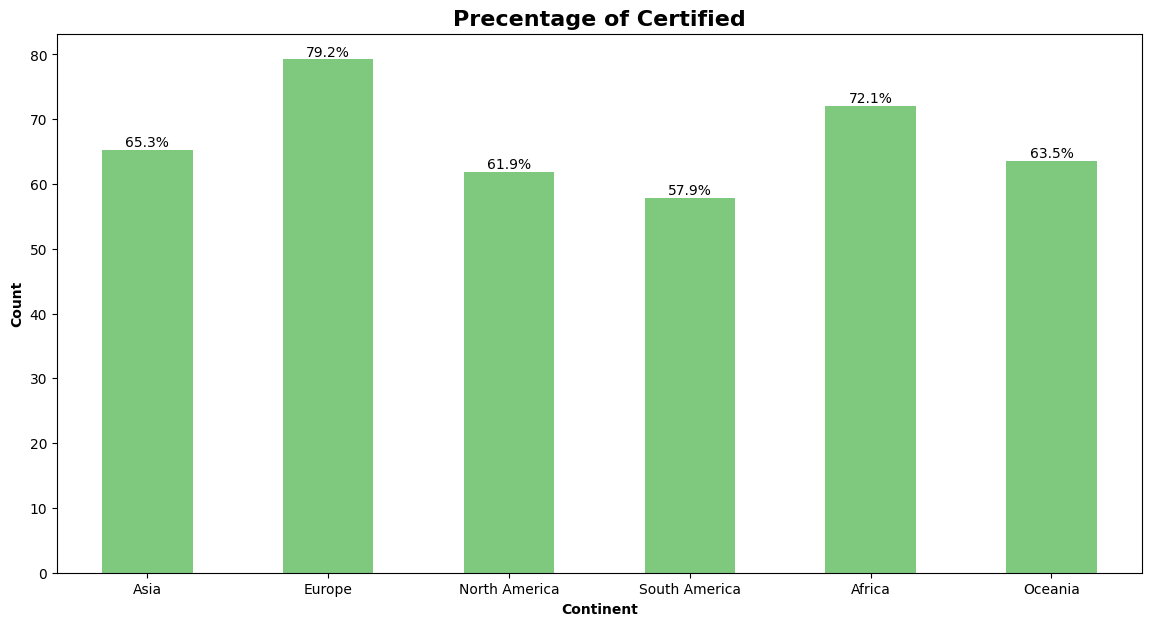

In [16]:
plt.figure(figsize=(14, 7))
order = (100 * df2[df2['case_status'] == 'Certified']['continent'].value_counts() / df2['continent'].value_counts())
order.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Precentage of Certified", fontsize=16, fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Continent', fontweight='bold')
plt.xticks(rotation= 0)
for i, count in enumerate(order):
    plt.text(i, count+0.5, f'{count:.1f}%', ha='center')
plt.show()    

In [17]:
# Grop data by Education and their count in case status
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

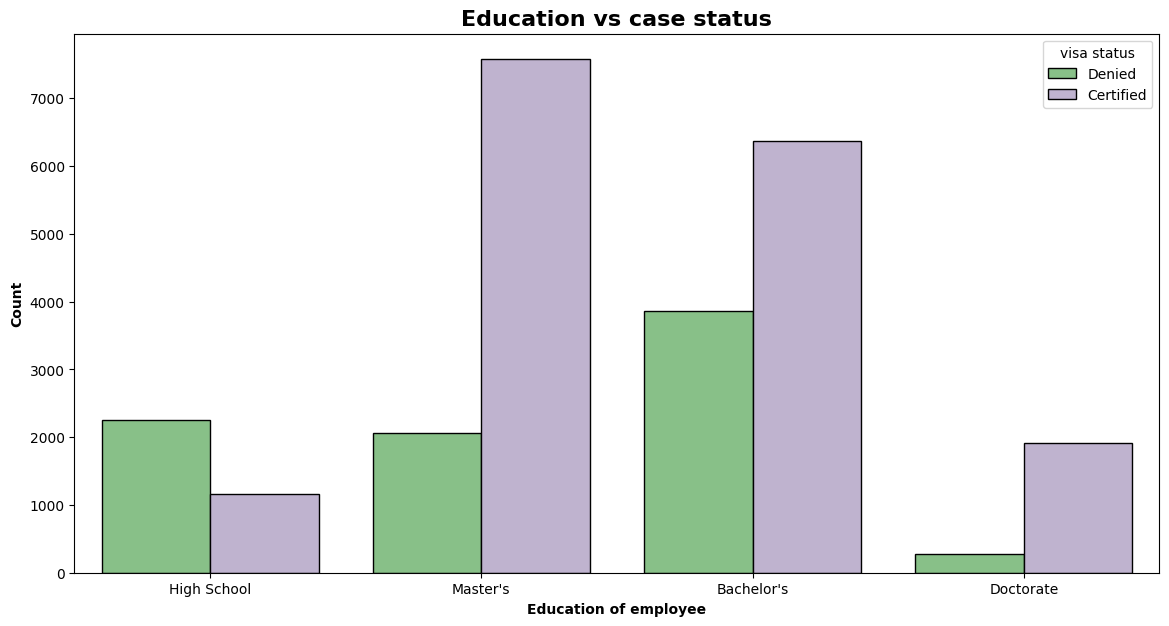

In [18]:
plt.subplots(figsize=(14, 7))
sns.countplot(x='education_of_employee', hue='case_status', data=df, ec='black', palette='Accent')
plt.xlabel("Education of employee", fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Education vs case status', fontsize=16, fontweight='bold')
plt.legend(title='visa status', fancybox=True)
plt.show()

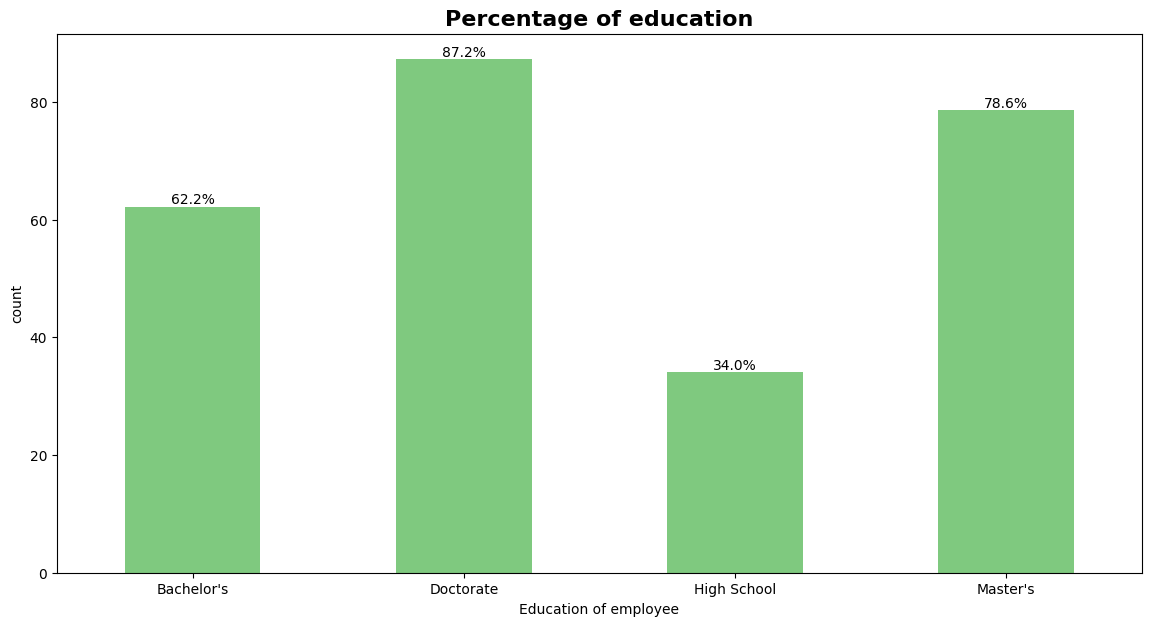

In [19]:
plt.figure(figsize=(14, 7))
order1 = (100 * df2[df2['case_status'] == 'Certified']['education_of_employee'].value_counts() / df2['education_of_employee'].value_counts())
order1.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Percentage of education", fontsize=16, fontweight='bold')
plt.xlabel('Education of employee')
plt.ylabel('count')
plt.xticks(rotation=0)
for i, count in enumerate(order1):
    plt.text(i, count+0.5, f'{count:.1f}%', ha='center')
plt.show()    

In [20]:
#Gropy the data by job experience
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

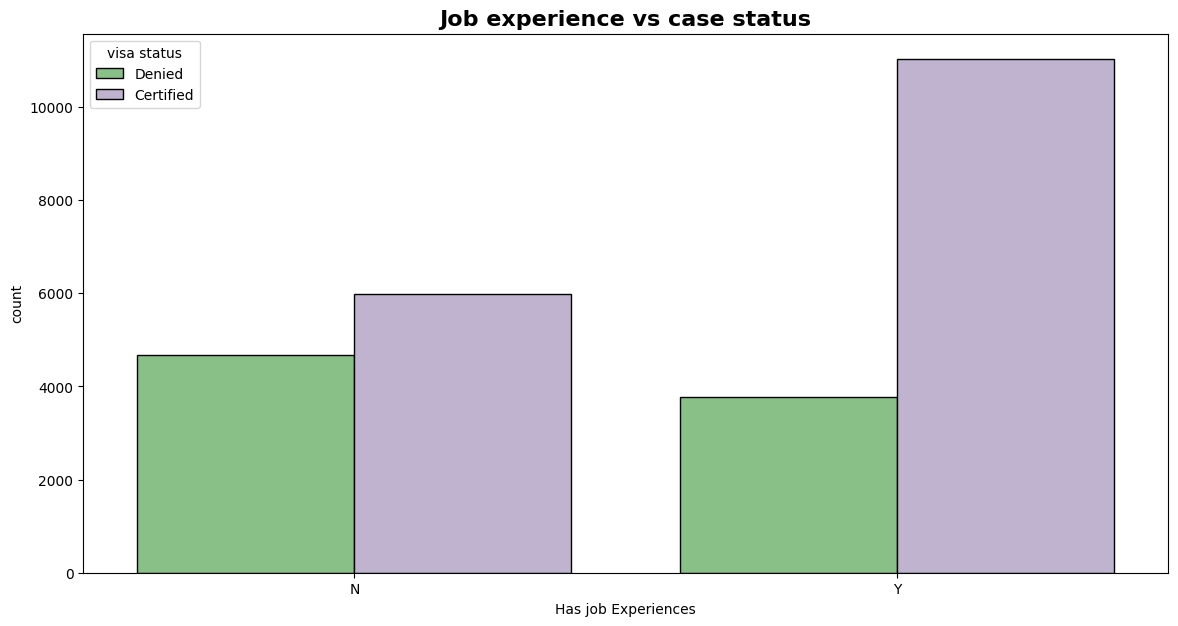

In [21]:
plt.subplots(figsize=(14, 7))
sns.countplot(x='has_job_experience', hue='case_status', data=df, ec='black', palette='Accent')
plt.title('Job experience vs case status', fontsize=16, fontweight='bold')
plt.xlabel('Has job Experiences')
plt.ylabel('count')
plt.legend(title='visa status', fancybox=True)
plt.show()

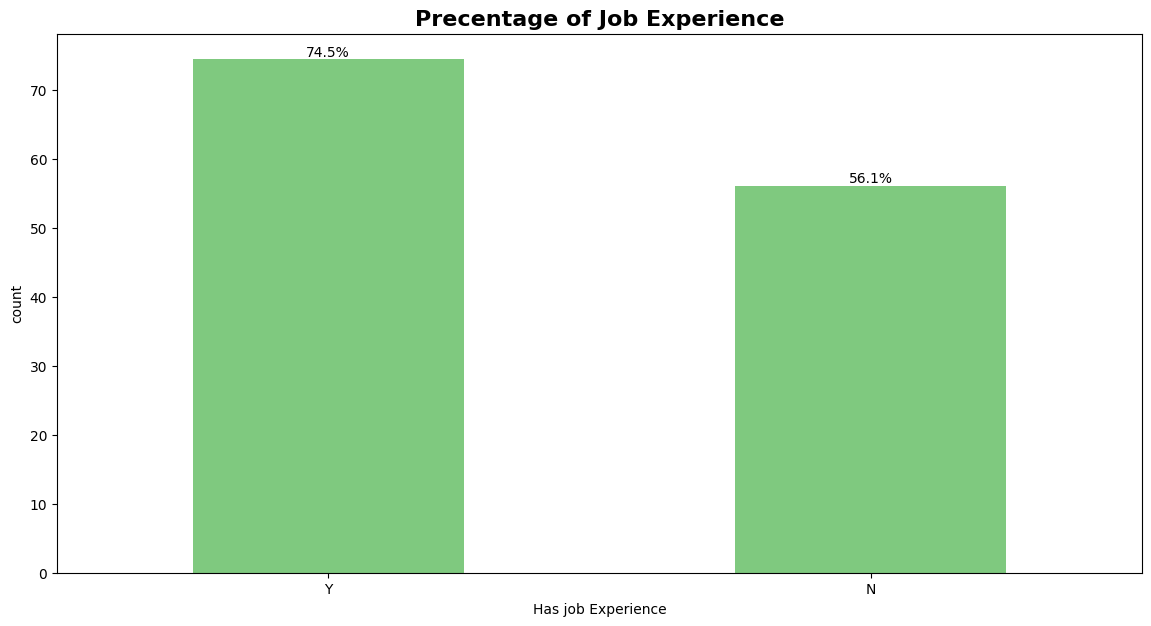

In [22]:
plt.figure(figsize=(14, 7))
order2 = (100 * df2[df2['case_status'] == 'Certified']['has_job_experience'].value_counts() / df2['has_job_experience'].value_counts())
order2.plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Precentage of Job Experience', fontsize=16, fontweight='bold')
plt.ylabel('count')
plt.xlabel('Has job Experience')
plt.xticks(rotation=0)
for i, count in enumerate(order2):
    plt.text(i, count+0.5, f'{count:.1f}%', ha='center')

plt.show()    

In [23]:
#Group data by requires job training and count case status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

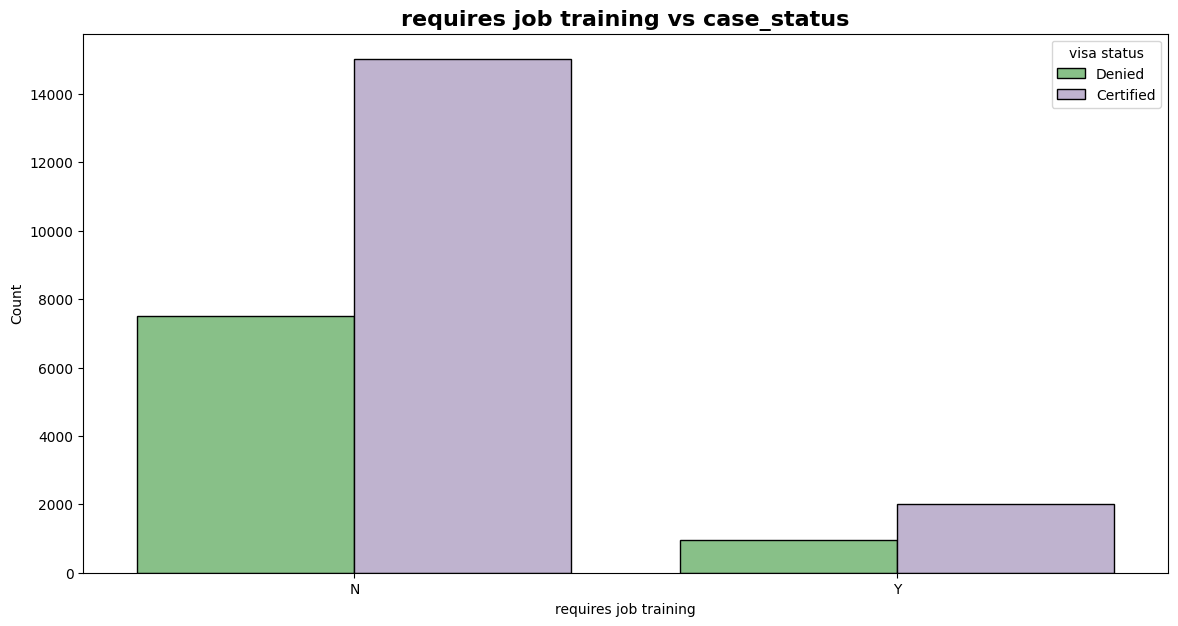

In [24]:
plt.subplots(figsize=(14, 7))
sns.countplot(x='requires_job_training', hue='case_status', data=df, ec='black', palette='Accent')
plt.title('requires job training vs case_status', fontweight='bold', fontsize=16)
plt.ylabel('Count')
plt.xlabel('requires job training')
plt.xticks(rotation=0)
plt.legend(title='visa status', fancybox=True)
plt.show()

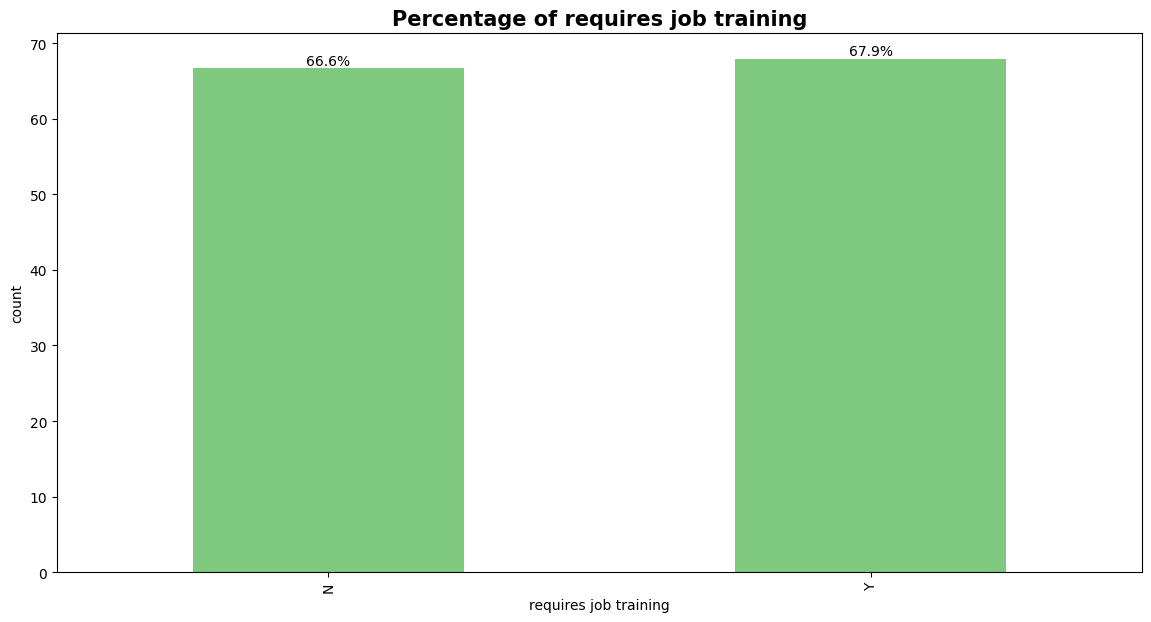

In [25]:
plt.figure(figsize=(14, 7))
order3 = (100 * df2[df2['case_status'] == 'Certified']['requires_job_training'].value_counts() / df2['requires_job_training'].value_counts())
order3.plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Percentage of requires job training', fontsize=15, fontweight='bold')
plt.ylabel('count')
plt.xlabel('requires job training')
for i, count in enumerate(order3):
    plt.text(i, count+0.5, f'{count:.1f}%', ha='center')
plt.show()    

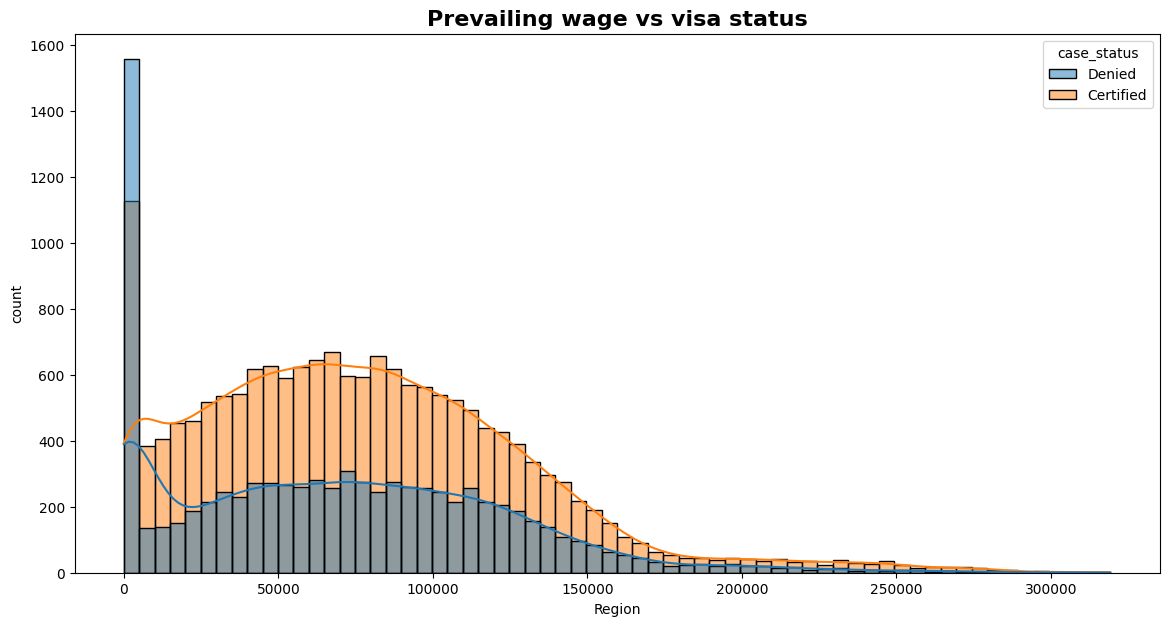

In [28]:
plt.subplots(figsize=(14, 7))
sns.histplot(x='prevailing_wage', hue='case_status', data=df, ec='black', kde=True)
plt.title('Prevailing wage vs visa status', weight='bold', fontsize='16')
plt.xlabel('Region')
plt.ylabel('count')
plt.show()

In [30]:
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage', ascending=False)

,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


In [31]:
print('median prevailing wage based on has job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage', ascending=False)

median prevailing wage based on has job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665
